<a href="https://colab.research.google.com/github/Dheeraj1458/Music-Genre-Classification/blob/main/Major_Project_(Music_Genre_Classification_using_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install librosa
!pip install seaborn

In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
import seaborn as sns

In [7]:
example_file = "/content/drive/MyDrive/GTZAN DATASET/GTZAN DATASET/Data/genres_original/blues/blues.00003.wav"

In [8]:
x,sr=librosa.load(example_file,sr=44100)
x.shape

(1323588,)

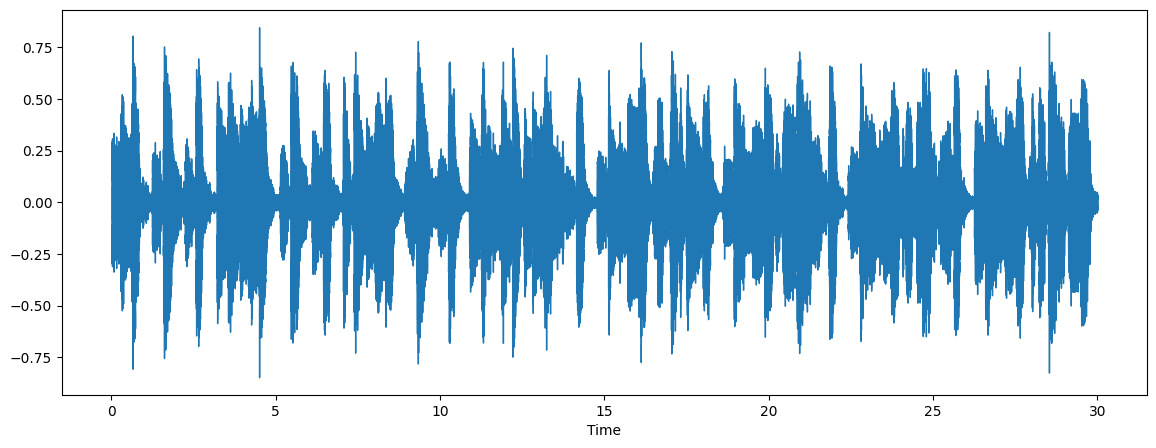

In [9]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(x, sr=sr)

In [10]:
from IPython.display import Audio
Audio(data=x,rate=sr)

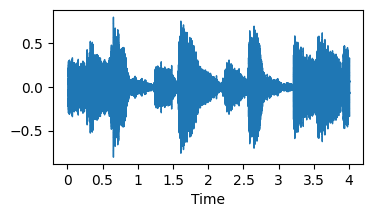

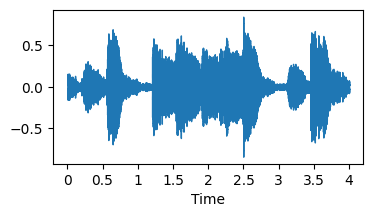

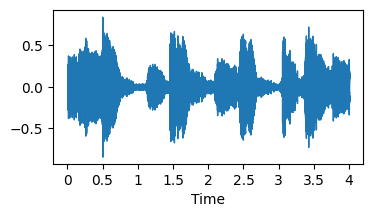

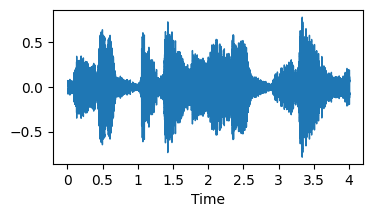

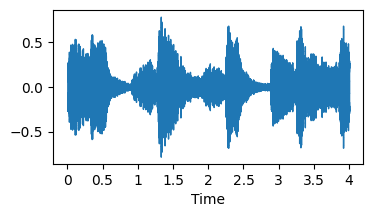

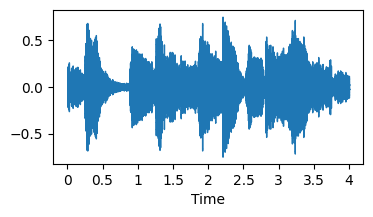

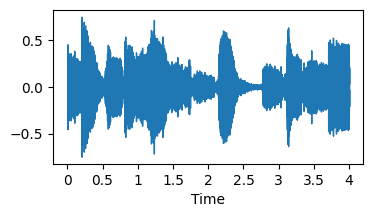

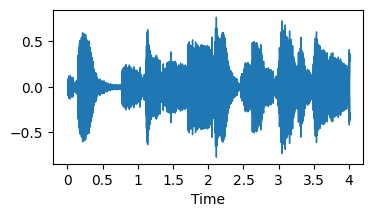

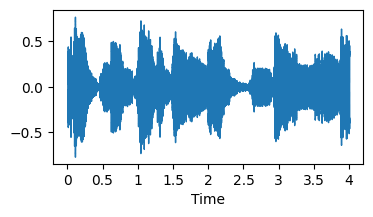

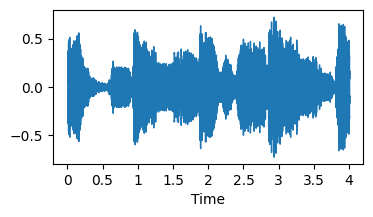

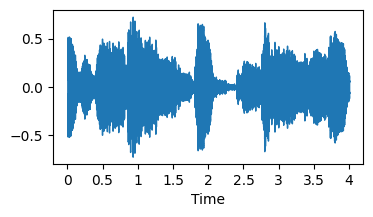

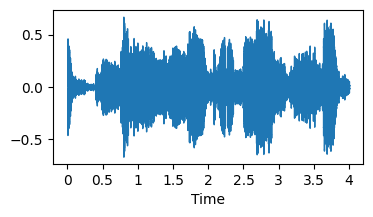

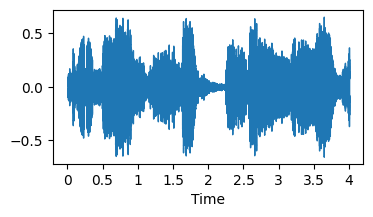

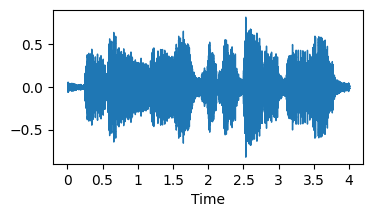

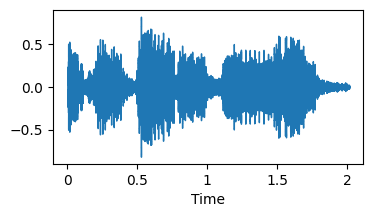

In [11]:
audio_path = "/content/drive/MyDrive/GTZAN DATASET/GTZAN DATASET/Data/genres_original/blues/blues.00003.wav"
y,sr= librosa.load(example_file,sr=None) #sr=None-- keep original sampling Rate
chunk_duration = 4
overlap_duration = 2

#Calculate y for Chunk -- convert duration to Sample
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate no of chunks
no_of_chunks= int(np.ceil((len(y)-chunk_samples)/(chunk_samples- overlap_samples)))+1

# Iteration of each chunk
for i in range(no_of_chunks):
  start= i* (chunk_samples - overlap_samples) # 0-4, 2-6,
  end = start + chunk_samples
  chunk= y[start:end]
  plt.figure(figsize=(4,2))
  librosa.display.waveshow(chunk,sr=sr)
  plt.show()

In [12]:
#Plotting Melspectrogram of Entire audio
def plot_melspectrogram(y,sr):
    # Compute the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    # Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    # Visualize the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

(128, 173)


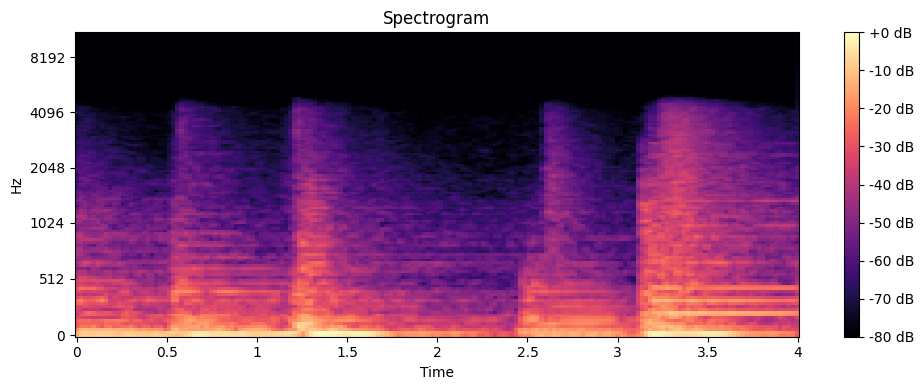

(128, 173)


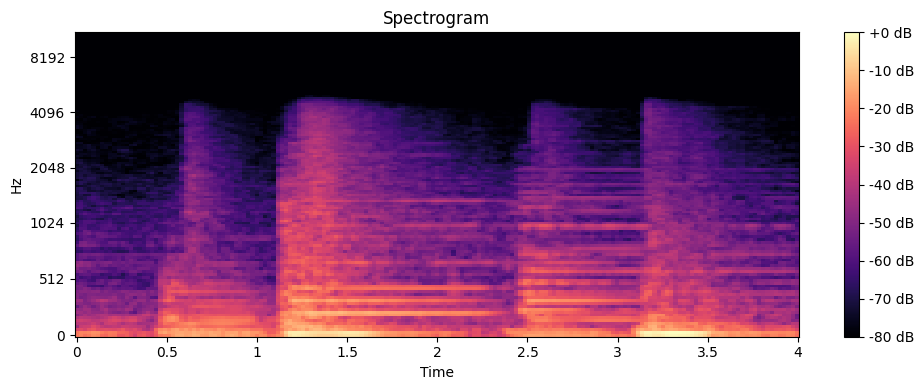

(128, 173)


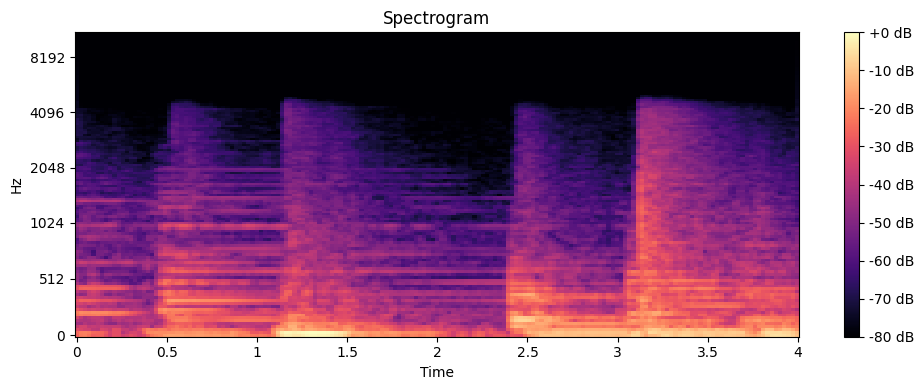

(128, 173)


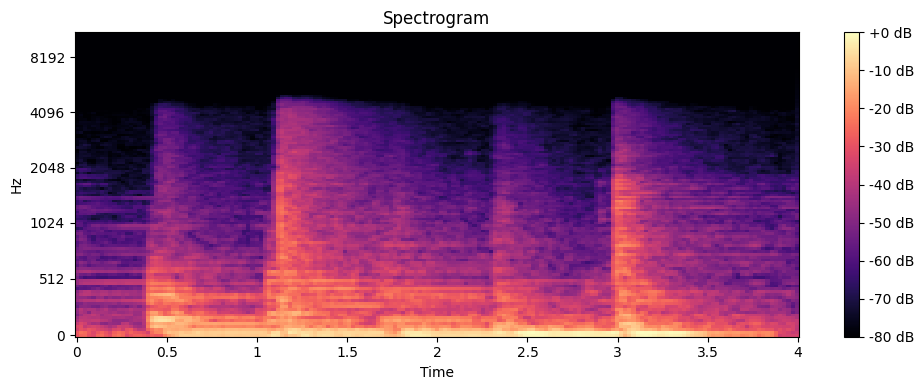

(128, 173)


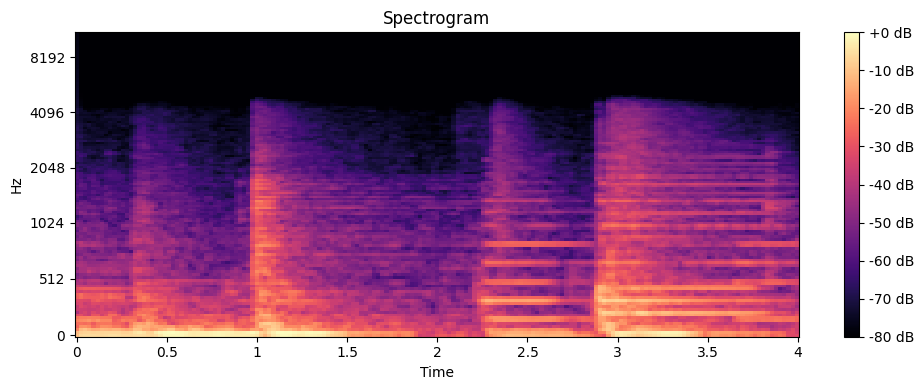

(128, 173)


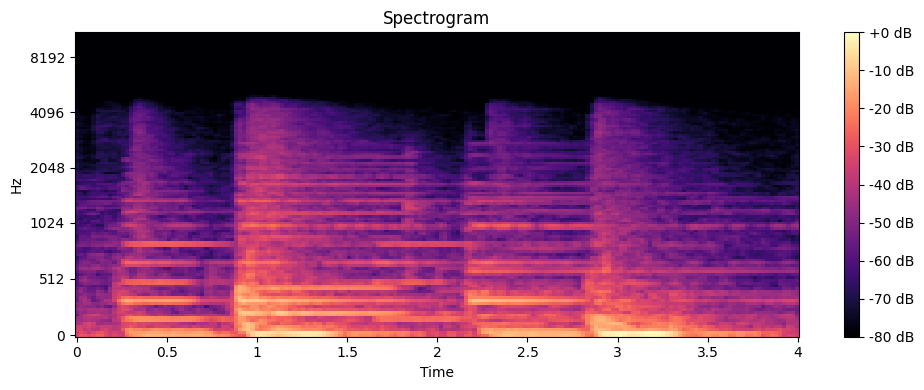

(128, 173)


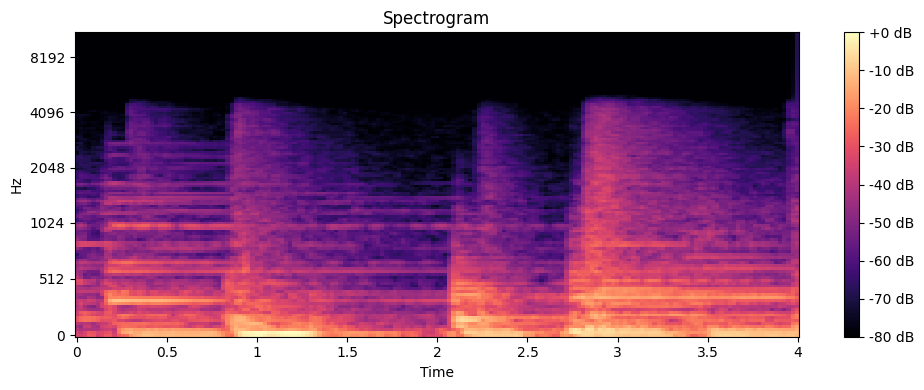

(128, 173)


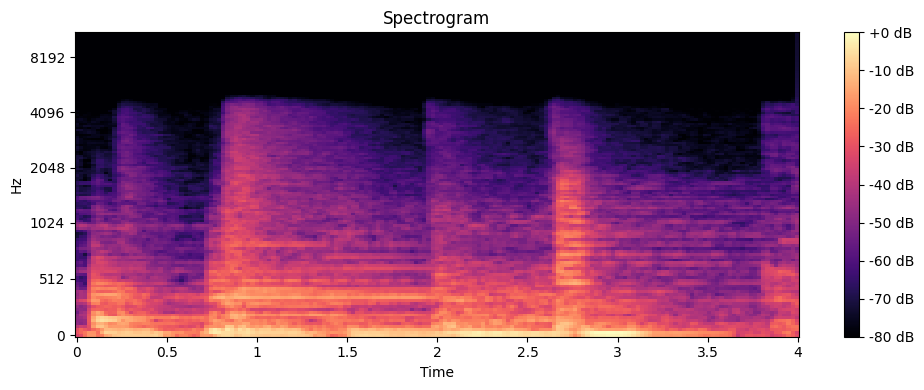

(128, 173)


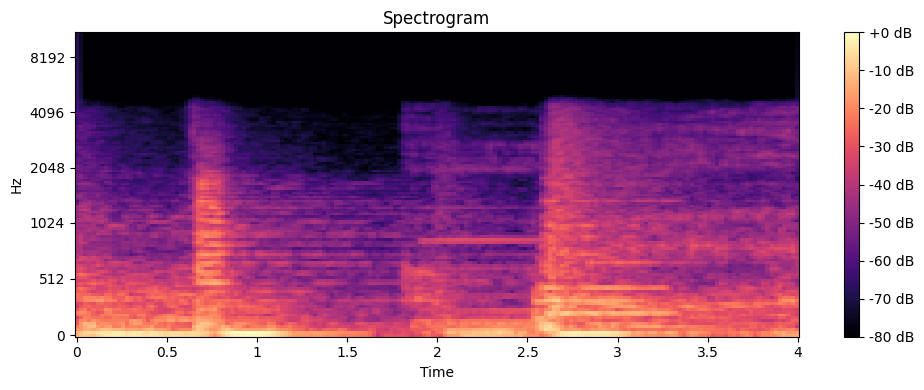

(128, 173)


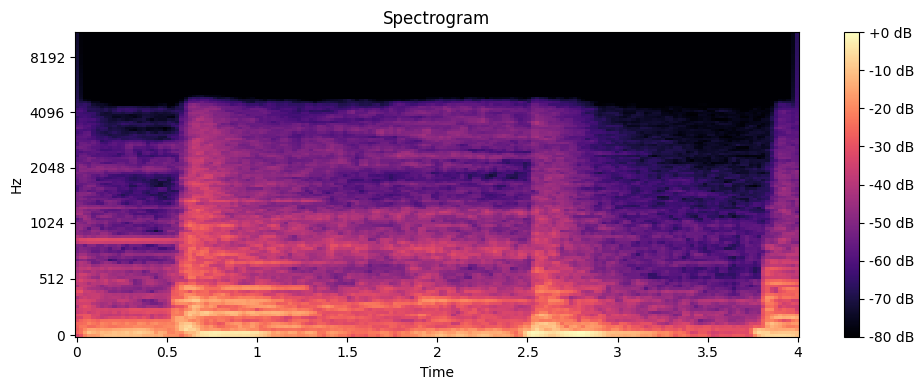

(128, 173)


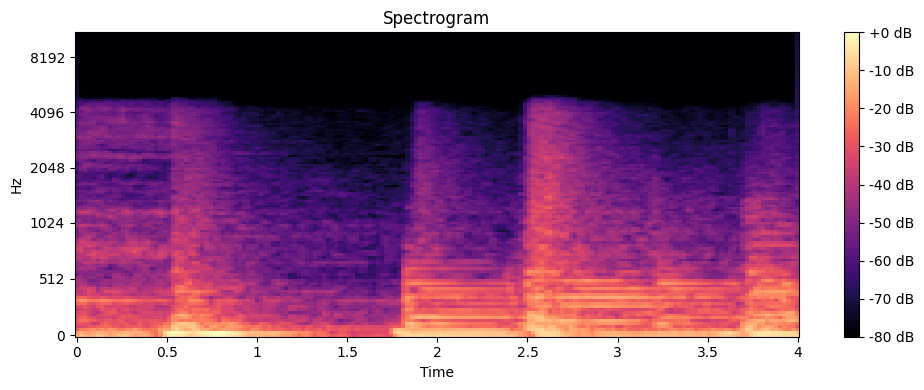

(128, 173)


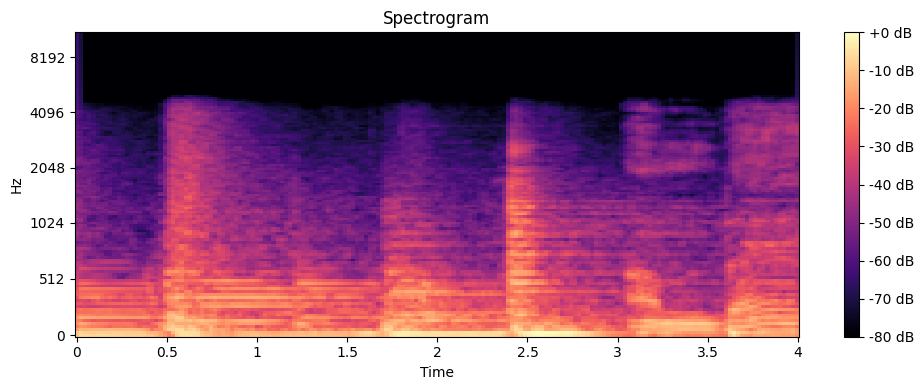

(128, 173)


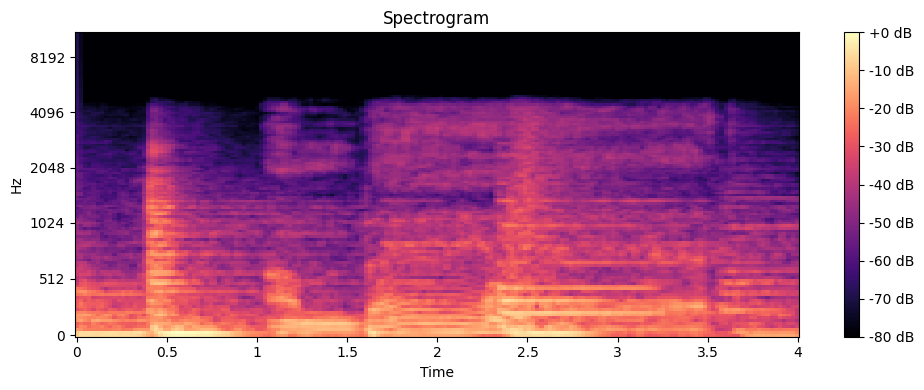

(128, 173)


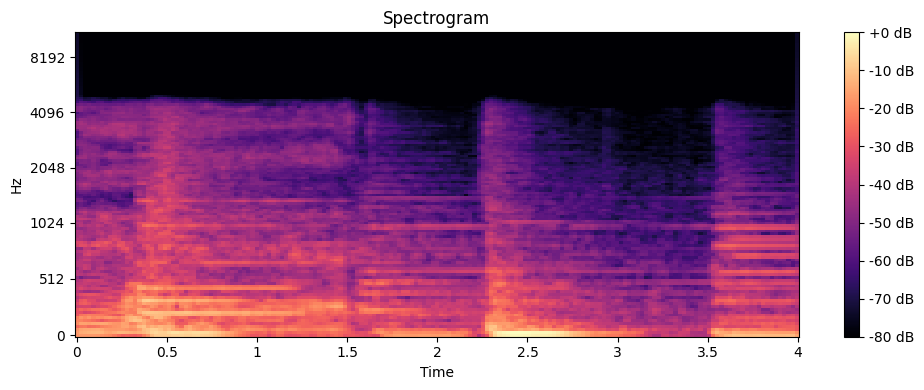

(128, 173)


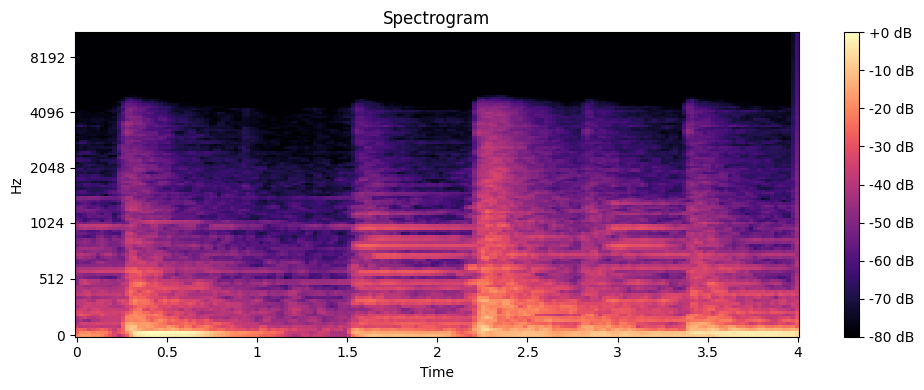

(128, 173)


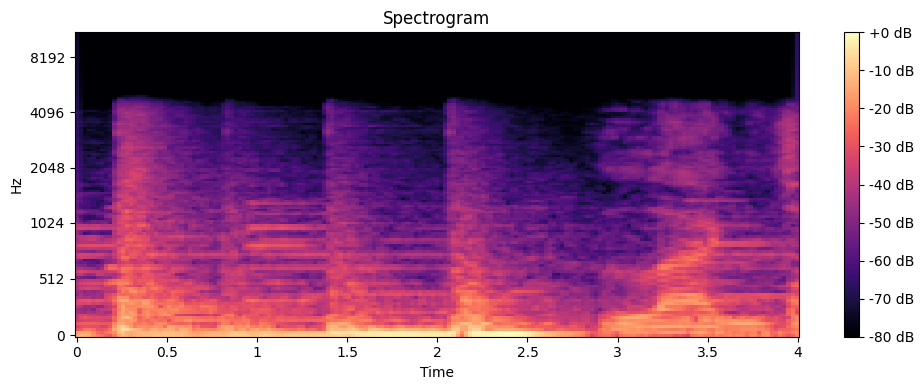

(128, 173)


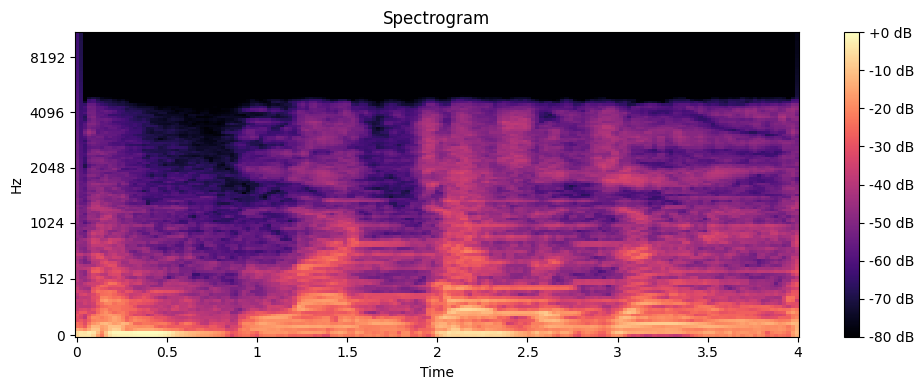

(128, 173)


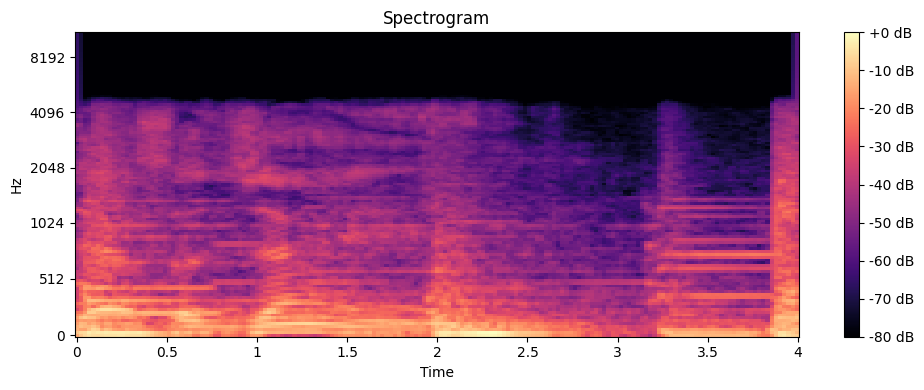

(128, 173)


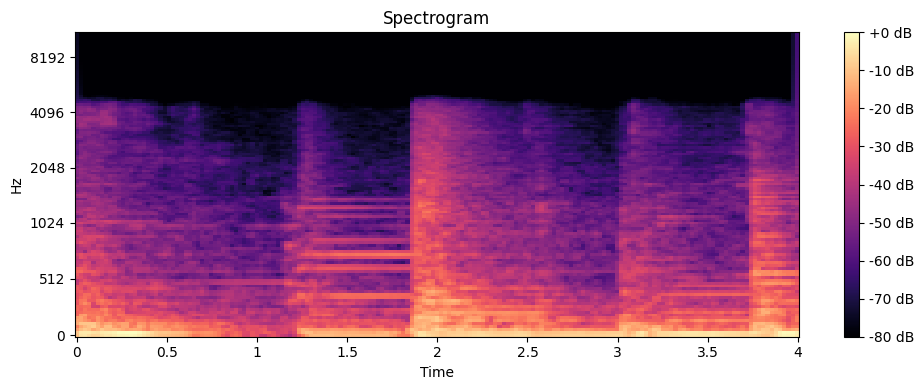

(128, 173)


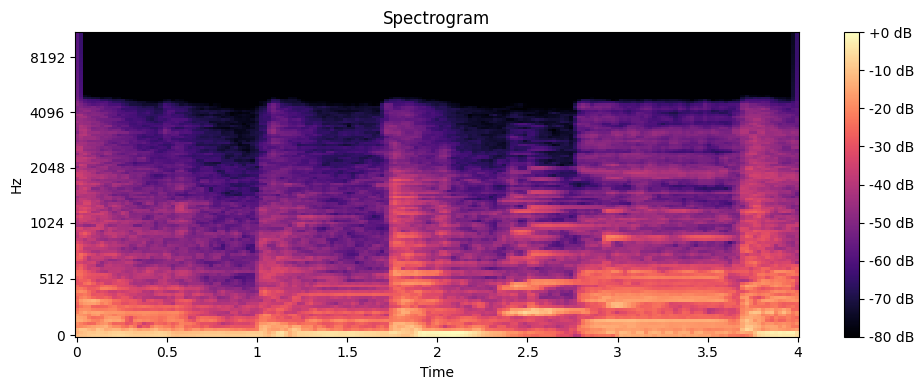

(128, 173)


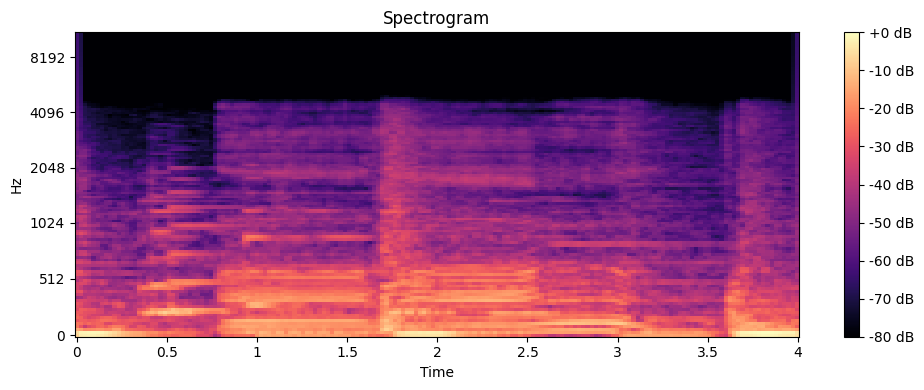

(128, 173)


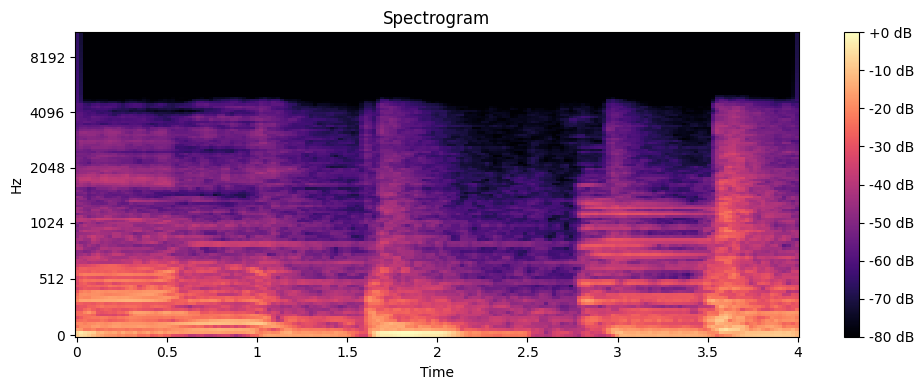

(128, 173)


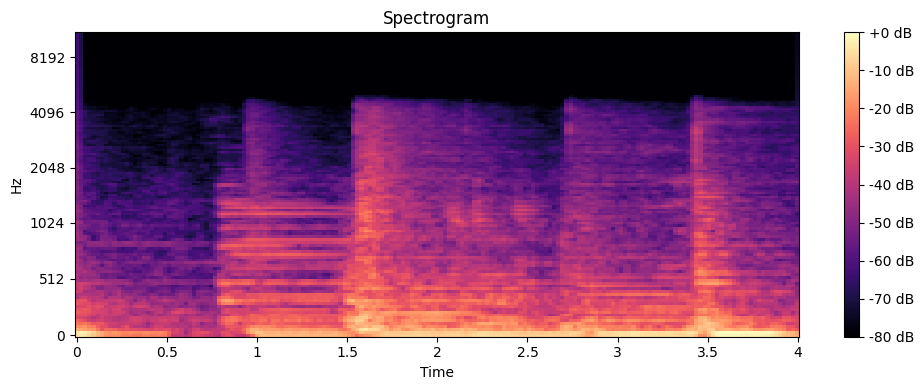

(128, 173)


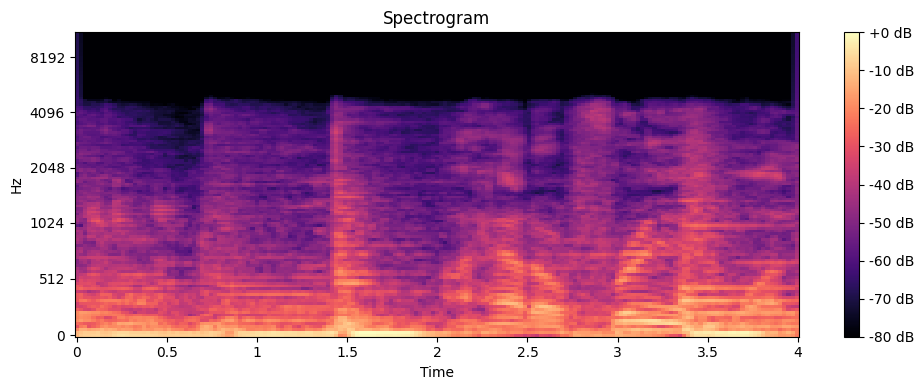

(128, 173)


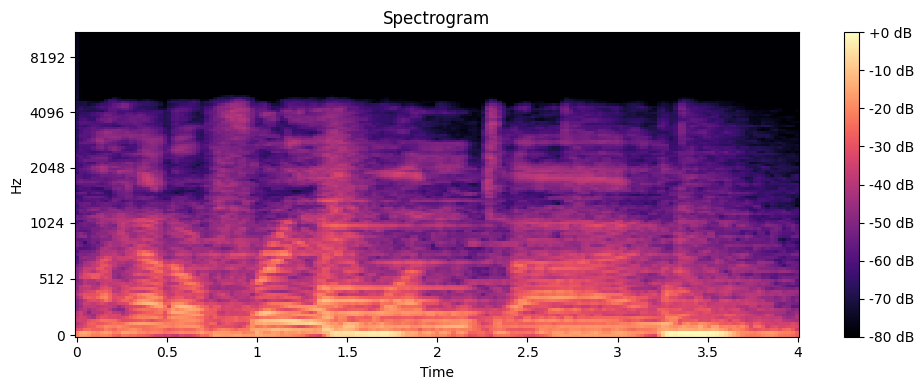

(128, 173)


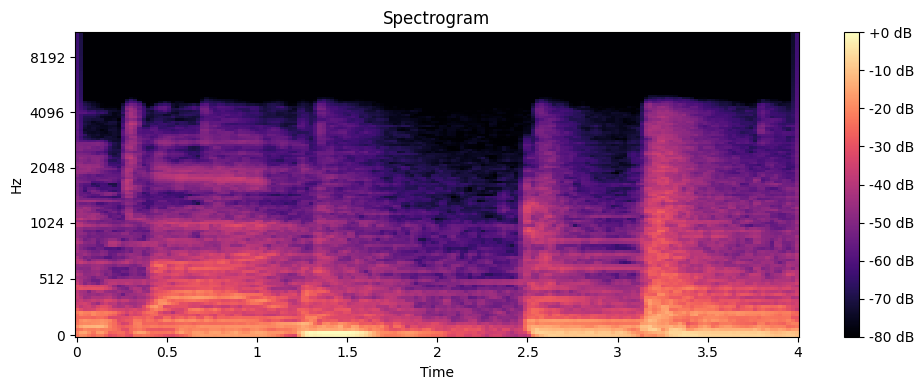

(128, 173)


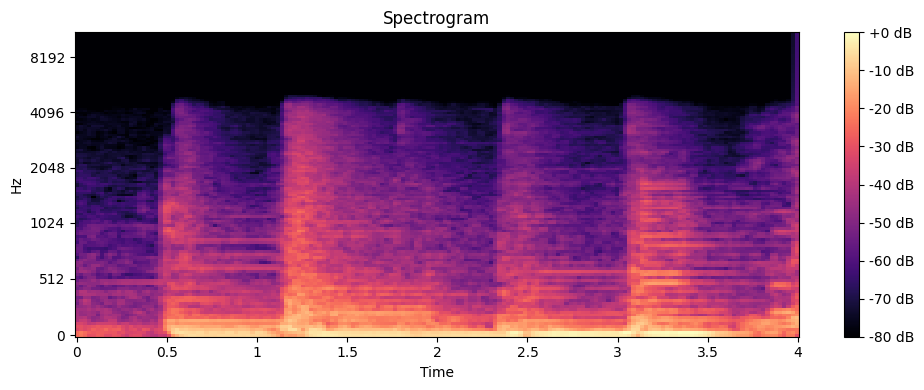

(128, 173)


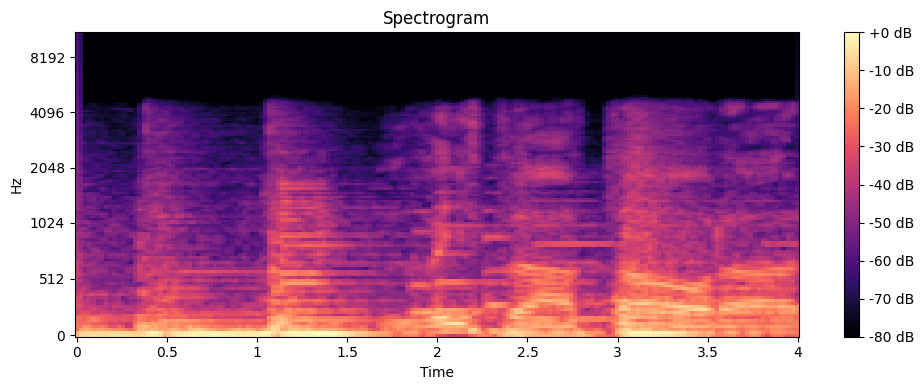

(128, 173)


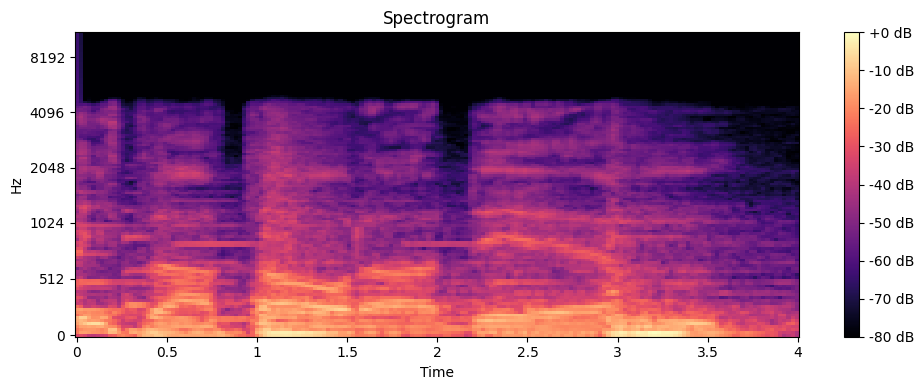

(128, 88)


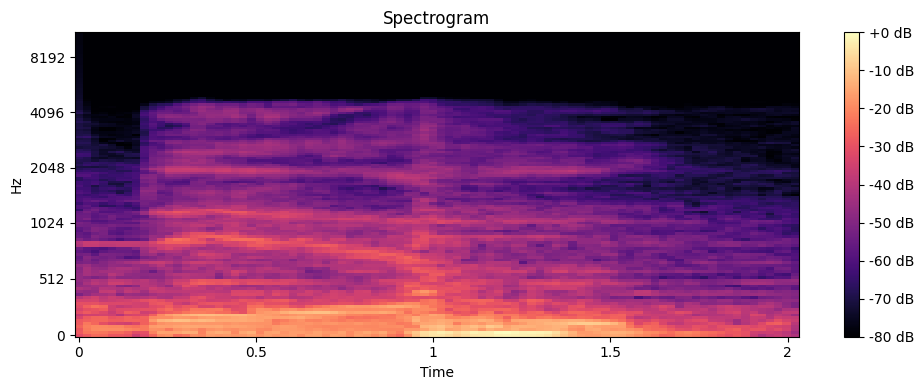

In [13]:
def plot_melspectrogram_chunks(y,sr):
    # Define the duration of each chunk and overlap
    chunk_duration = 4  # seconds
    overlap_duration = 2  # seconds

    # Convert durations to samples
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr

    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

    # Iterate over each chunk
    for i in range(num_chunks):
        # Calculate start and end indices of the chunk
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples

        # Extract the chunk of audio
        chunk = y[start:end]

        # Compute the Mel spectrogram for the chunk
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(mel_spectrogram.shape)
        spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        # Visualize the spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        plt.show()

#Spectrogram of Audio chunks
plot_melspectrogram_chunks(y=x,sr=sr)

In [17]:
data_dir = r'/content/drive/MyDrive/GTZAN DATASET/GTZAN DATASET/Data/genres_original' # Updated path to the extracted dataset location
classes = ['blues', 'classical','country','disco','hiphop','metal','pop','reggae','rock']

In [15]:

def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)
                # Perform preprocessing (e.g., convert to Mel spectrogram and resize)
                # Define the duration of each chunk and overlap
                chunk_duration = 4  # seconds
                overlap_duration = 2  # seconds

                # Convert durations to samples
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate

                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

                # Iterate over each chunk
                for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples

                    # Extract the chunk of audio
                    chunk = audio_data[start:end]

                    # Compute the Mel spectrogram for the chunk
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)

                #mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                    data.append(mel_spectrogram)
                    labels.append(i_class)

    return np.array(data), np.array(labels)

In [18]:
data, labels = load_and_preprocess_data(data_dir, classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [19]:
data.shape

(13490, 150, 150, 1)

In [21]:
labels.shape

(13490,)

In [22]:
labels

array([0, 0, 0, ..., 8, 8, 8])

In [23]:
labels = to_categorical(labels, num_classes=len(classes))
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
labels.shape

(13490, 9)

In [25]:
data.shape

(13490, 150, 150, 1)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [27]:
X_train[0].shape

(150, 150, 1)

In [28]:
input_shape=(150, 150, 1)
model = tf.keras.models.Sequential()
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(units=1200,activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(units=len(classes),activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │        10,809 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,181,257 (27.39 MB)

 Trainable params: 7,181,257 (27.39 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
X_train.shape,y_train.shape

((10792, 150, 150, 1), (10792, 9))

In [43]:
training_history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.9725 - loss: 0.0864 - val_accuracy: 0.9110 - val_loss: 0.3134
Epoch 2/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 26s 76ms/step - accuracy: 0.9707 - loss: 0.0875 - val_accuracy: 0.9192 - val_loss: 0.3171
Epoch 3/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 26s 77ms/step - accuracy: 0.9761 - loss: 0.0755 - val_accuracy: 0.9199 - val_loss: 0.2804
Epoch 4/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 26s 78ms/step - accuracy: 0.9701 - loss: 0.0841 - val_accuracy: 0.9062 - val_loss: 0.3024
Epoch 5/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.9786 - loss: 0.0709 - val_accuracy: 0.9181 - val_loss: 0.2923
Epoch 6/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 27s 80ms/step - accuracy: 0.9884 - loss: 0.0376 - val_accuracy: 0.9196 - val_loss: 0.2844
Epoch 7/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 27s 79ms/step - accuracy: 0.9840 - loss: 0.0481 - val_accuracy: 0.8936 - val_loss: 0.3448
Epoch 8/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 27s 80ms/step - accuracy: 0.9725 - loss: 0.0819 - 

In [44]:
model.save("Trained_model.h5")

In [45]:
model.save("Trained_model.keras") #Windows

In [46]:
training_history.history

{'accuracy': [0.9689584970474243,
  0.9721089601516724,
  0.974888801574707,
  0.9698851108551025,
  0.9753521084785461,
  0.9863787889480591,
  0.980170488357544,
  0.9780392646789551,
  0.9835063219070435,
  0.9855448603630066,
  0.987398087978363,
  0.9778539538383484,
  0.9852668642997742,
  0.9831356406211853,
  0.9838769435882568],
 'loss': [0.0932149663567543,
  0.08112721145153046,
  0.07968368381261826,
  0.08796362578868866,
  0.07945546507835388,
  0.04590289294719696,
  0.059931524097919464,
  0.06826364994049072,
  0.050896670669317245,
  0.0480005145072937,
  0.03938516974449158,
  0.07223498076200485,
  0.044513605535030365,
  0.04709107428789139,
  0.05287093669176102],
 'val_accuracy': [0.9110451936721802,
  0.9191994071006775,
  0.919940710067749,
  0.9062268137931824,
  0.9180874824523926,
  0.9195700287818909,
  0.8936249017715454,
  0.9002965092658997,
  0.9288361668586731,
  0.9151223301887512,
  0.917346179485321,
  0.9154929518699646,
  0.9266123175621033,
  0.9

In [47]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [48]:
X_train

array([[[[5.89440984e-04],
         [4.59185708e-03],
         [7.00310152e-03],
         ...,
         [6.30242601e-02],
         [8.92063901e-02],
         [5.53953573e-02]],

        [[3.84126790e-04],
         [3.12885549e-03],
         [4.84172720e-03],
         ...,
         [1.53143629e-02],
         [2.14594044e-02],
         [1.41627984e-02]],

        [[2.00383467e-04],
         [1.26034173e-03],
         [2.87030963e-03],
         ...,
         [9.01725667e-04],
         [1.02982216e-03],
         [1.62759353e-03]],

        ...,

        [[2.77739582e-06],
         [2.76738433e-06],
         [3.93345090e-06],
         ...,
         [1.58649925e-07],
         [2.34461382e-07],
         [2.60731213e-07]],

        [[3.13846931e-06],
         [3.82790313e-06],
         [6.64526988e-06],
         ...,
         [1.33653003e-07],
         [2.01124294e-07],
         [2.52487979e-07]],

        [[3.16447358e-06],
         [3.11676763e-06],
         [5.95571237e-06],
         ...,
 

In [49]:
#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [50]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [51]:
train_loss,train_accuracy = model.evaluate(X_train,y_train)

338/338 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9959 - loss: 0.0124


In [52]:
train_loss,train_accuracy

(0.011504136957228184, 0.9962935447692871)

In [53]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,y_test)

85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9245 - loss: 0.2596


In [54]:
val_loss,val_accuracy

(0.2718101739883423, 0.9251297116279602)